В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Given values
z = np.array([-2, -1, 0, 1, 2])

# Calculate sigmoid values
sigmoid_values = sigmoid(z)

# Print the result
print("Sigmoid values:", sigmoid_values)


Sigmoid values: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]




#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [30]:
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return sigmoid(z)

# Given values
theta = np.array([0.5, -0.5])
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])

# Calculate hypothesis values
hypothesis_values = hypothesis(theta, X)

# Print the result
print("Hypothesis values:", hypothesis_values)


Hypothesis values: [0.37754067 0.73105858 0.62245933 0.5       ]


#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [31]:
def compute_gradient(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    error = h - y
    gradient = (1 / m) * np.dot(X.T, error)
    return gradient

# Given values
theta = np.array([0.5, -0.5])
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 0, 1, 0])

# Calculate gradients
gradient_values = compute_gradient(theta, X, y)

# Print the result
print("Gradient values:", gradient_values)


Gradient values: [ 0.05776464 -0.36899431]



#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


Final theta: [-0.2893693   0.77655125]


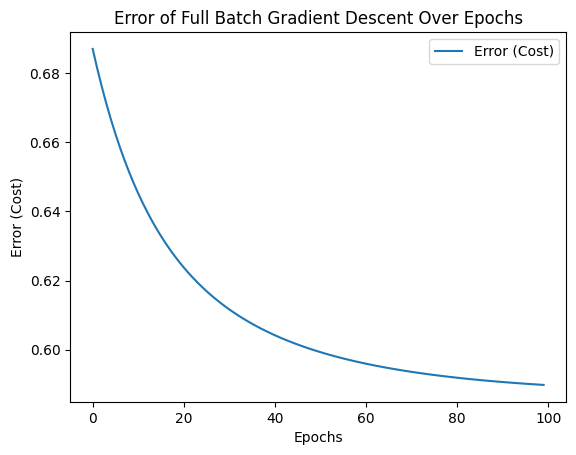

In [32]:
# Define compute_cost function to calculate log loss
def compute_cost(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Modified full_batch_gradient_descent to track cost history
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    theta = np.zeros(X.shape[1])
    cost_history = []  # List to store cost at each epoch

    for epoch in range(epochs):
        gradient = compute_gradient(theta, X, y)
        theta = theta - lr * gradient
        cost = compute_cost(theta, X, y)  # Calculate cost at current epoch
        cost_history.append(cost)  # Store cost in the list

    return theta, cost_history

# Given values
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 0, 1, 0])

# Calculate final model parameters and get cost history
theta_final, cost_history = full_batch_gradient_descent(X, y)
print("Final theta:", theta_final)

# Plot the cost history
plt.plot(range(len(cost_history)), cost_history, label='Error (Cost)')
plt.xlabel('Epochs')
plt.ylabel('Error (Cost)')
plt.title('Error of Full Batch Gradient Descent Over Epochs')
plt.legend()
plt.show()

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [33]:
def predict_proba(theta, X):
    return sigmoid(np.dot(X, theta))

def predict(theta, X, threshold=0.5):
    probabilities = predict_proba(theta, X)
    return (probabilities >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Given values
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 0, 1, 0])

# Using the previously found theta parameters
theta_final = np.array([-0.2893693, 0.77655125])

# Calculate probabilities
probabilities = predict_proba(theta_final, X)

# Predict classes
predicted_classes = predict(theta_final, X)

# Calculate accuracy
model_accuracy = accuracy(y, predicted_classes)

# Print results
print("Probabilities of belonging to class 1 for each instance in X:", probabilities)
print("\nPredicted classes for each instance in X:", predicted_classes)
print("\nModel accuracy:", model_accuracy)


Probabilities of belonging to class 1 for each instance in X: [0.77966809 0.25617966 0.42815828 0.61944235]

Predicted classes for each instance in X: [1 0 0 1]

Model accuracy: 0.5
